# Temas Tratados en el Trabajo Pr√°ctico 3

* Estrategias de b√∫squeda local.

* Algoritmos Evolutivos.

* Problemas de Satisfacci√≥n de Restricciones.

# Ejercicios Te√≥ricos


## ¬øQu√© mecanismo de detenci√≥n presenta el algoritmo de Ascensi√≥n de Colinas? Describa el problema que puede presentar este mecanismo y c√≥mo se llaman las √°reas donde ocurren estos problemas.

<p> El mecanismo "Ascensi√≥n de Colinas" o "Climbing Hills" utiliza una meta-heur√≠stica la cual consiste en avanzar continuamente en direcci√≥n del valor creciente en el espacio de estados. Es decir, el mecanismo se desplaza √∫nicamente en direcci√≥n de "un mejor estado", siempre toma el camino que genere un mejor resultado instant√°neo. Adem√°s, no mantiene un √°rbol de b√∫squeda, por lo que solo monitorea el estado actual y su valor de funci√≥n objetivo.</p>

<p> El hecho de que solo avance hacia un mejor estado del problema tiene sus desventajas: </p>

* Como solo "avanza hacia adelante" (solo busca estados mejores que el actual) podr√≠a culminar en un m√°ximo local y quedarse all√≠, y no encontrar nunca el m√°ximo global.

* Tiene dificultad para tratar a las crestas: puede pasar que la pendiente se aproxime demasiado a un pico y la b√∫squeda oscilar√° de un lado al otro, obteniendo un avance muy bajo o nulo.

* En las mesetas del problema el algoritmo podr√≠a quedarse dando vueltas indefinidamente sin saber hacia d√≥nde avanzar.

* Incluso cuando encuentra un m√°ximo, no hay forma de saber si existe uno mejor en otra parte del espacio.

<p> Para remarcarlo, el mecanismo presenta problemas en: <b>m√°ximos locales</b>, <b>mesetas</b> (tanto terrazas como mesetas de m√°ximos locales) y <b>crestas</b> muy empinadas.</p>


## Describa las distintas heur√≠sticas que se emplean en un problema de Satisfacci√≥n de Restricciones.

Las heur√≠sticas utilizadas en un problema de satisfacci√≥n de Restricciones son eficaces y gen√©ricas, ya que no requieren informaci√≥n espec√≠fica adicional del dominio. las distintas heur√≠sticas que se pueden utilizr son:
-   **Chequeo hacia adelante:** cada vez que se asigna un valor a una variable, se reduce el dominio de las variables vecinas. Pero si alg√∫n vecino se queda sin valores posibles, se debe retroceder.
-   **Heur√≠stica de grado m√°ximo:** se toma como estado inicial aquel que tiene mayor n¬∞ de restricciones para evitar futuros conflictos (que se quede sin valores posibes).
-   **Heur√≠stica de m√≠nimos valores restantes:** En un cierto estado, siempre elige la variable con menos valores legales, ya que si se cubre esa primero, el resto siempre tendr√° alg√∫n valor legal restante para asignarle.
-   **Heur√≠stica del valor menos restringida:** en cada estado, siempre que se pueda elegir un valor que est√° repetido se lo elige, es decir, aquel que elimine menos posibilidades para las dem√°s variables, de forma que queden valores restantes sin usar para las variables con mayores restricciones. 

## Se desea colorear el rompecabezas mostrado en la imagen con 7 colores distintos de manera que ninguna pieza tenga el mismo color que sus vecinas. Realice en una tabla el proceso de una b√∫squeda con Comprobaci√≥n hacia Adelante empleando una heur√≠stica del Valor m√°s Restringido.

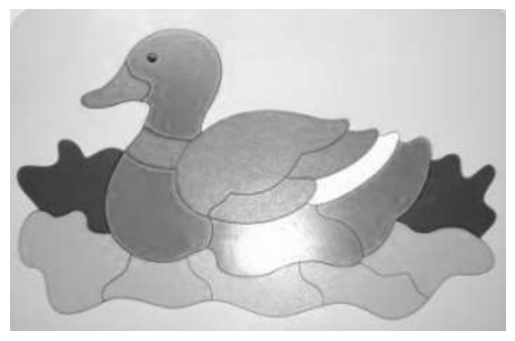

In [2]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1j94jFVxVG9y_ZnrMWOscQGb2MZ0Cdb3R"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

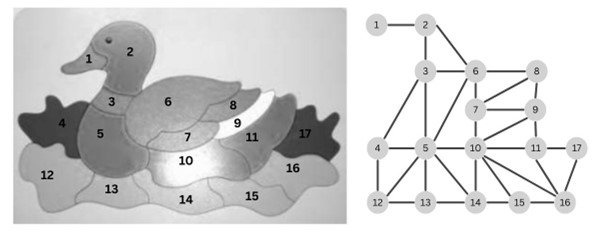

Tabla del proceso de b√∫squeda con comprobaci√≥n hacia adelante, usando heur√≠stica del valor m√°s restringido.
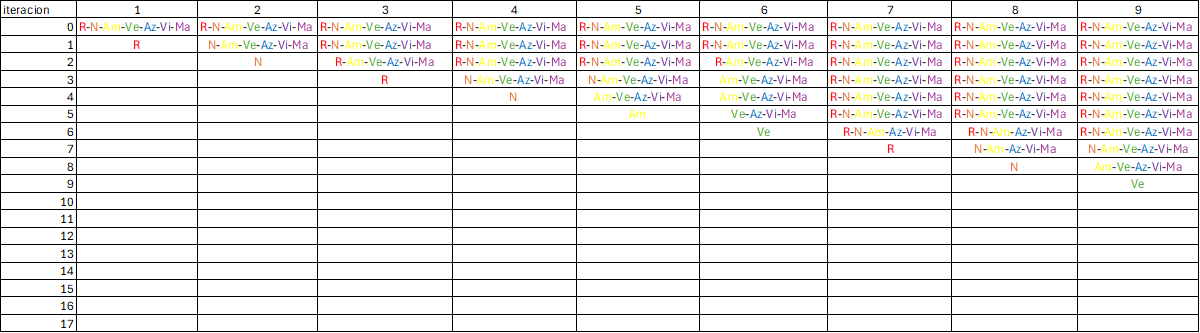
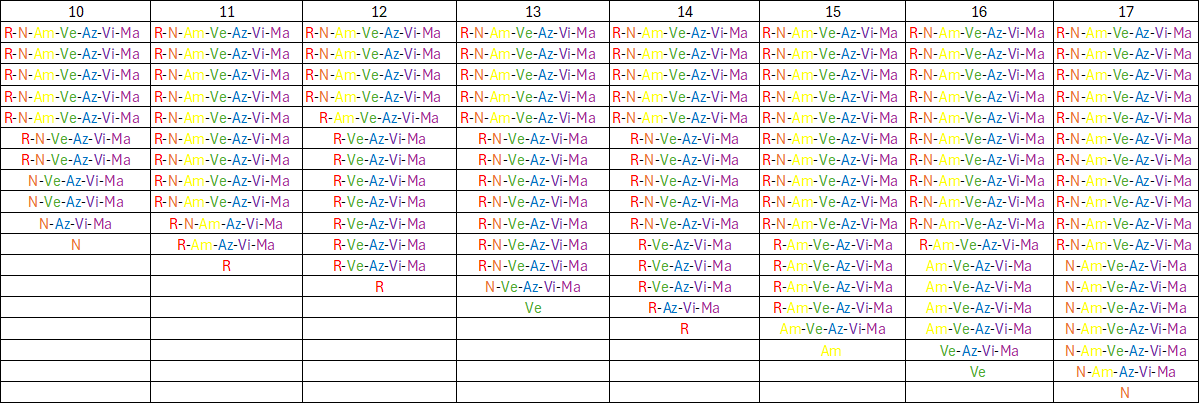

Verificaci√≥n mediante c√≥digo

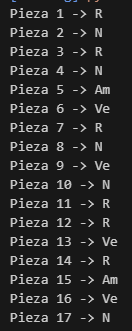

Se observa que solo son necesarios 4 colores para pintar esta imagen.

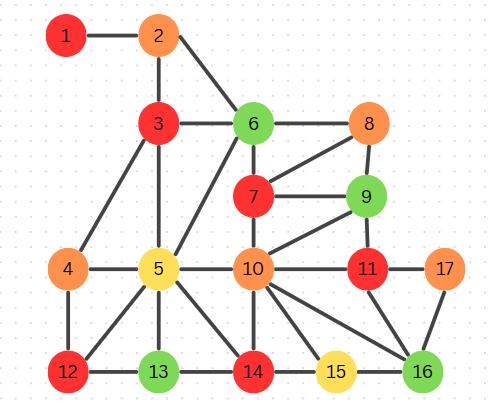

# Ejercicios de Implementaci√≥n

## Encuentre el m√°ximo de la funci√≥n $f(x) = \frac{\sin(x)}{x + 0.1}$ en $x \in [-10; -6]$ con un error menor a $0.1$ utilizando el algoritmo _hill climbing_.

 x_inicial  f(x_inicial)  x_max_encontrado  f(x_max_encontrado)
 -8.818769      0.065329         -7.768769             0.129926
 -7.600496      0.129064         -7.750496             0.130011
 -6.350011      0.010684         -7.750011             0.130013
 -9.485597     -0.006476         -7.685597             0.129964
 -7.541716      0.127879         -7.691716             0.129992
 -9.754369     -0.033524         -7.754369             0.129997
 -7.053900      0.100181         -7.753900             0.129999
 -8.520915      0.093306         -7.770915             0.129913
M√°ximo global encontrado por el algoritmo:
x = -7.750010920807812  ; f(x) = 0.1300128748659443


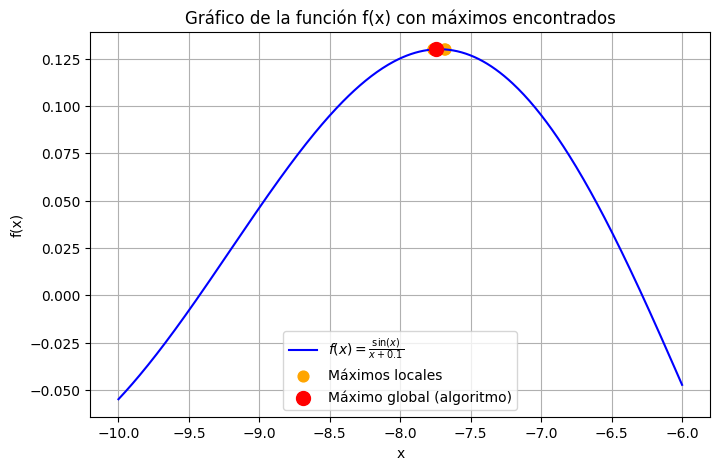

In [38]:
# Importo numpy para la funci√≥n sin(x)
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    if x < -10 or x > -6:
        raise ValueError("x debe estar en el intervalo [-10, -6]")
    else:
        return (np.sin(x))/(x+0.1)

def ClimbingHill(f, x0, error, max_iter=100000):
    step = 0.05
    x = x0
    for i in range(max_iter):
        vecinos = [x - step, x + step]
        next_x = max(vecinos, key=f)

        if f(next_x) - f(x) < error:
            return next_x
        x = next_x

resultados = []

for i in range(8):
    semilla = -10 + (random.random() * (-6 - (-10)))
    error = 1e-9

    maximo = ClimbingHill(f, semilla, error)
    
    resultados.append({
        "x_inicial": semilla,
        "f(x_inicial)": f(semilla),
        "x_max_encontrado": maximo,
        "f(x_max_encontrado)": f(maximo)
    })

# Convertir a tabla con pandas
df = pd.DataFrame(resultados)

# Mostrar tabla
print(df.to_string(index=False))

# Generar puntos en el intervalo v√°lido
x_vals = np.linspace(-10, -6, 400)
y_vals = [f(x) for x in x_vals]

# Buscar el m√°ximo global dentro de los encontrados por el algoritmo
idx_max = df["f(x_max_encontrado)"].idxmax()   # √≠ndice del m√°ximo
x_max_global = df.loc[idx_max, "x_max_encontrado"]
y_max_global = df.loc[idx_max, "f(x_max_encontrado)"]

print("M√°ximo global encontrado por el algoritmo:")
print("x =", x_max_global, " ; f(x) =", y_max_global)

# Graficar la funci√≥n
plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label=r"$f(x) = \frac{\sin(x)}{x+0.1}$", color="blue")

# Marcar todos los m√°ximos locales encontrados
plt.scatter(df["x_max_encontrado"], df["f(x_max_encontrado)"], 
            color="orange", s=60, label="M√°ximos locales")

# Marcar el m√°ximo maximorum
plt.scatter(x_max_global, y_max_global, 
            color="red", s=100, zorder=5, label="M√°ximo global (algoritmo)")

# Configuraci√≥n
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gr√°fico de la funci√≥n f(x) con m√°ximos encontrados")
plt.legend()
plt.grid(True)
plt.show()


##### Notas

* Soluci√≥n

En este caso, buscar una soluci√≥n anal√≠tica es dif√≠cil. Se conoce la expresi√≥n para la funci√≥n y su derivada, por lo que usando m√©todos num√©ricos se encuentra el m√°ximo local en [-10; -6]. La soluci√≥n de ac√° se saca con MATLAB.

$$
f(x) = \frac{\sin(x)}{x+0.1}
$$
$$
f'(x) = \frac{\cos(x)(x+0.1)-\sin(x)}{(x+0.1)^{2}}
$$
$$
f_{max} \rightarrow x \approx 0.130015
$$

* `semilla = -10 + (random.random() * (-6 - (-10)))`

Tomamos una semilla aleatorea para mostrar que existen m√°ximos locales y que el m√©todo Climbing Hills podr√≠a quedarse atorado en un m√°ximo local en vez del m√°ximo global.

* `next_x = max(vecinos, key=f)`

Se utiliza "key=f" para que la funci√≥n `max()` compare los valores `f(vecinos[i])` en vez de los valores de la lista `vecinos[i]`.

#### Anexo 4.1

En el intervalo [-10, -6] existe un √∫nico m√°ximo, que podr√≠amos decir que es el "m√°ximo global" de nuestro "paisaje del espacio de estado". Para ello, si disminuimos la frecuencia de la expreci√≥n sinusoidal, podemos "apretar" la funci√≥n y observaremos que aparecen m√°ximos locales y un √∫nico "m√°ximo global" en nuestro "paisaje del espacio de estado" en [-10, -6].

Nueva expresi√≥n:

$$
f_{\text{nueva}} = \frac{\sin(2\pi x)}{x+0.1}
$$

 x_inicial  f(x_inicial)  x_max_encontrado  f(x_max_encontrado)
 -9.177386      0.098896         -9.277386             0.107354
 -6.095235      0.093959         -6.295235             0.154938
 -6.988760     -0.010244         -7.288760             0.135001
 -8.443475      0.041678         -8.293475             0.117523
 -7.731912     -0.130183         -7.281912             0.136449
 -6.644429     -0.120400         -6.294429             0.155186
 -8.994513     -0.003876         -9.294513             0.104534
 -9.578870     -0.050166         -9.278870             0.107158
M√°ximo global encontrado por el algoritmo:
x = -6.294428553951991  ; f(x) = 0.15518610041423628


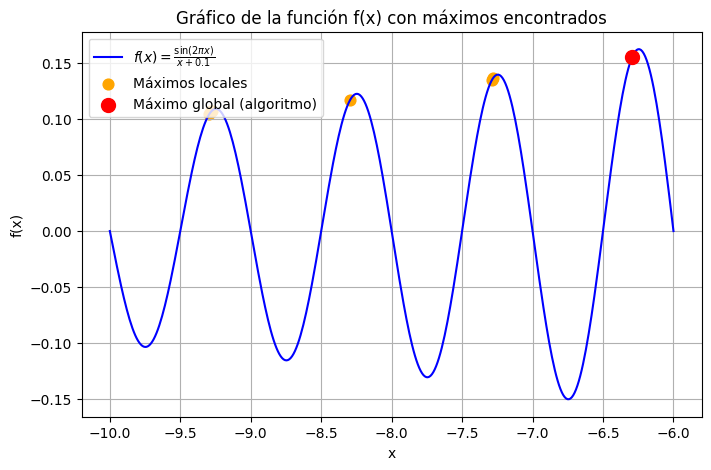

In [44]:
# Importo numpy para la funci√≥n sin(x)
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    if x < -10 or x > -6:
        raise ValueError("x debe estar en el intervalo [-10, -6]")
    else:
        return (np.sin(2*np.pi*x))/(x+0.1)

def ClimbingHill(f, x0, error, max_iter=100000):
    step = 0.05
    x = x0
    for i in range(max_iter):
        vecinos = [x - step, x + step]
        next_x = max(vecinos, key=f)

        if f(next_x) - f(x) < error:
            return next_x
        x = next_x

resultados = []

for i in range(8):
    semilla = -10 + (random.random() * (-6 - (-10)))
    error = 1e-9

    maximo = ClimbingHill(f, semilla, error)
    
    resultados.append({
        "x_inicial": semilla,
        "f(x_inicial)": f(semilla),
        "x_max_encontrado": maximo,
        "f(x_max_encontrado)": f(maximo)
    })

# Convertir a tabla con pandas
df = pd.DataFrame(resultados)

# Mostrar tabla
print(df.to_string(index=False))

# Generar puntos en el intervalo v√°lido
x_vals = np.linspace(-10, -6, 400)
y_vals = [f(x) for x in x_vals]

# Buscar el m√°ximo global dentro de los encontrados por el algoritmo
idx_max = df["f(x_max_encontrado)"].idxmax()   # √≠ndice del m√°ximo
x_max_global = df.loc[idx_max, "x_max_encontrado"]
y_max_global = df.loc[idx_max, "f(x_max_encontrado)"]

print("M√°ximo global encontrado por el algoritmo:")
print("x =", x_max_global, " ; f(x) =", y_max_global)

# Graficar la funci√≥n
plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label=r"$f(x) = \frac{\sin(2 \pi x)}{x+0.1}$", color="blue")

# Marcar todos los m√°ximos locales encontrados
plt.scatter(df["x_max_encontrado"], df["f(x_max_encontrado)"], 
            color="orange", s=60, label="M√°ximos locales")

# Marcar el m√°ximo maximorum
plt.scatter(x_max_global, y_max_global, 
            color="red", s=100, zorder=5, label="M√°ximo global (algoritmo)")

# Configuraci√≥n
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gr√°fico de la funci√≥n f(x) con m√°ximos encontrados")
plt.legend()
plt.grid(True)
plt.show()


Ac√° se nota mejor el problema de este mecanismo: puede quedar atrapado en m√°ximos locales, y no salir de ellos, fallando al objetivo de encontrar el m√°ximo global.

## Dise√±e e implemente un algoritmo de Recocido Simulado para que juegue contra usted al Ta-te-ti. Var√≠e los valores de temperatura inicial entre partidas, ¬øqu√© diferencia observa cuando la temperatura es m√°s alta con respecto a cuando la temperatura es m√°s baja?

Cuando jug√°s con Recocido Simulado, la diferencia clave entre una temperatura inicial alta y una baja est√° en la probabilidad de aceptar jugadas ‚Äúmalas‚Äù al principio:

* Con temperatura alta el algoritmo es m√°s permisivo: acepta con mayor probabilidad movimientos peores (jugadas que a corto plazo parecen malas). Esto permite explorar m√°s el espacio de soluciones, escapar de √≥ptimos locales y probar estrategias poco convencionales. En el Ta-te-ti, la IA puede sorprender con movimientos menos obvios, incluso arriesgados, antes de estabilizarse.

* Con temperatura baja la aceptaci√≥n de jugadas malas casi desaparece: la b√∫squeda se vuelve codiciosa, solo toma jugadas que parecen mejorar inmediatamente. Esto hace que la IA juegue m√°s r√≠gida y predecible, pero tambi√©n corre el riesgo de quedarse ‚Äúatascada‚Äù en decisiones mediocres sin explorar alternativas mejores a largo plazo

Se pone el script del c√≥digo, pero para su correcto funcionamiento debe ejecutarse el c√≥digo TaTeTi.py en la terminal, caso contrario no funcionar√° de la manera deseada.

### 1. Tablero y reglas

* def new_board(): return [' '] * 9

Crea un tablero vac√≠o de 9 casillas.

* def print_board(b):

Dibuja el tablero en consola, reemplazando espacios vac√≠os por n√∫meros de casilla (1‚Äì9).



def available_moves(b): ...

def place(b, i, mark): ...

def winner(b): ...

def is_draw(b): ...

def copy_board(b): ...

#### Funciones utilitarias:

* available_moves: devuelve lista de posiciones libres.

* place: coloca X u O.

* winner: chequea las combinaciones ganadoras.

* is_draw: empate (tablero lleno sin ganador).

* copy_board: copia para simular sin modificar el original.

### 2. Rollouts (simulaciones de jugadas)

Estas funciones permiten evaluar una jugada mirando al futuro:

* random_policy_move: juega greedy (si puede ganar, gana; si debe bloquear, bloquea; si no, juega al azar).

* simulate_from_move: ejecuta una partida entera desde una jugada, devolviendo +1 si gana la IA, 0 empate, -1 si pierde.

* estimated_value: repite la simulaci√≥n N veces (rollouts) y calcula el valor esperado de esa jugada.

Esto te da una funci√≥n heur√≠stica estoc√°stica: mide la ‚Äúcalidad‚Äù de cada casilla.

### 3. Recocido Simulado (SA)
def Recocido(...):


Ac√° est√° la esencia:

Arranca con un movimiento candidato (current).

Eval√∫a su valor (cur_val).

Repite mientras la temperatura T > Tf:

Genera un vecino (otro movimiento posible).

Calcula la diferencia de energ√≠a dE.

Acepta o no con la probabilidad:


$$
P = e^{(-\Delta E / T)}
$$

Si mejora, guarda el mejor movimiento (best).

Al final devuelve el best.

Traducci√≥n a IA: cuanto m√°s alta es la T, m√°s probable es que el agente acepte jugadas malas (explora). Con T baja, se vuelve codicioso (explotaci√≥n).

### 4. Interfaz de juego

* def ask_move(b, mark): ...

Pregunta al humano por consola (usa input()). Valida la jugada.

def play_human_vs_sa(...):


#### Loop principal:

<b>Elige al azar</b> qui√©n es humano y qui√©n IA.

Turnos alternados.

Humano ‚Üí ask_move.

IA ‚Üí Recocido.

Revisa ganador o empate.

### 5. Punto de entrada
def main():
    ...
    play_human_vs_sa(...)


Ejecuta el juego con par√°metros por defecto (T0=5.0, alpha=0.95, etc.).

### NOTA

Se deshabilito la opci√≥n de "bloquear jugada". Es decir, la IA no tiene un comportamiento de "si no pongo mi jugada ac√°, perder√©, entonces bloquear√© al rival", sino que se rige exclusivamente por el comportamiento del Recocido. Para habilitar esta opci√≥n se debe descomentar las lineas de 98 a 117.

In [ ]:
# Ta-te-ti con IA por Recocido Simulado (Simulated Annealing)

import math
import random

# ----------------- Tablero y reglas -----------------

def new_board():
    return [' '] * 9

def print_board(b):
    print()
    for r in range(3):
        row = b[3*r:3*r+3]
        print(' ' + ' | '.join(c if c != ' ' else str(3*r+i+1) for i, c in enumerate(row)))
        if r < 2: print("---+---+---")
    print()

def available_moves(b):
    return [i for i, c in enumerate(b) if c == ' ']

def place(b, i, mark):
    b[i] = mark

def winner(b):
    lines = [(0,1,2),(3,4,5),(6,7,8),
             (0,3,6),(1,4,7),(2,5,8),
             (0,4,8),(2,4,6)]
    for i,j,k in lines:
        if b[i] != ' ' and b[i] == b[j] == b[k]:
            return b[i]
    return None

def is_draw(b):
    return winner(b) is None and all(c != ' ' for c in b)

def copy_board(b):
    return b[:]

# ----------------- Rollouts para evaluar una jugada -----------------

def random_policy_move(b, player):
    """Pol√≠tica simple para los rollouts: si hay jugada ganadora inmediata la toma,
    si puede bloquear p√©rdida inmediata bloquea; si no, juega al azar."""
    for i in available_moves(b):
        bb = copy_board(b)
        place(bb, i, player)
        if winner(bb) == player:
            return i
    opp = 'O' if player == 'X' else 'X'
    for i in available_moves(b):
        bb = copy_board(b)
        place(bb, i, opp)
        if winner(bb) == opp:
            return i
    return random.choice(available_moves(b))

def simulate_from_move(b, move, ai, hu):
    """Simula una partida completa desde la jugada 'move' del AI.
       Devuelve +1 si gana AI, 0 empate, -1 si pierde."""
    bb = copy_board(b)
    place(bb, move, ai)
    w = winner(bb)
    if w == ai: return 1
    if is_draw(bb): return 0

    turn = hu
    while True:
        m = random_policy_move(bb, turn)
        place(bb, m, turn)
        w = winner(bb)
        if w == ai: return 1
        if w == hu: return -1
        if is_draw(bb): return 0
        turn = ai if turn == hu else hu

def estimated_value(b, move, ai, hu, rollouts=40):
    """Promedia N simulaciones desde la jugada 'move'."""
    s = 0
    for _ in range(rollouts):
        s += simulate_from_move(b, move, ai, hu)
    return s / rollouts

# ----------------- Recocido Simulado para elegir jugada -----------------

def Recocido(b, ai, hu, T0=5.0, Tf=0.1, alpha=0.95, L=20, rollouts=40):
    """Devuelve una casilla usando Simulated Annealing.
       - T0: temperatura inicial
       - Tf: temperatura final
       - alpha: factor de enfriamiento (geom√©trico)
       - L: iteraciones por temperatura
       - rollouts: simulaciones por evaluaci√≥n"""
    
    empties = available_moves(b)

    # Si hay jugada ganadora inmediata o bloqueo, s√© pragm√°tico:
    
    #for i in empties:
    #    bb = copy_board(b)
    #    place(bb, i, ai)
    #    if winner(bb) == ai:
    #        return i
    #for i in empties:
    #    bb = copy_board(b)
    #    place(bb, i, hu)
    #    if winner(bb) == hu:
    #        return i

    # Candidato inicial: cualquiera libre
    current = random.choice(empties)
    best = current
    cur_val = estimated_value(b, current, ai, hu, rollouts=rollouts)
    best_val = cur_val

    T = T0
    while T > Tf and len(empties) > 1:
        for _ in range(L):
            # Vecino: otra casilla libre distinta
            neighbor = current
            while neighbor == current:
                neighbor = random.choice(empties)
            neigh_val = estimated_value(b, neighbor, ai, hu, rollouts=rollouts)
            dE = -(neigh_val - cur_val)  # energ√≠a = -valor
            # Aceptaci√≥n de Metr√≥polis
            if dE < 0 or random.random() < math.exp(-dE / T):
                current, cur_val = neighbor, neigh_val
                if cur_val > best_val:
                    best, best_val = current, cur_val
        T *= alpha
    return best

# ----------------- Interfaz de juego -----------------

def ask_move(b, mark):
    while True:
        s = input(f"Turno de {mark}. Casillero (1-9): ").strip()
        try:
            i = int(s) - 1
            if i not in range(9): print("Rango 1-9, maestro."); continue
            if b[i] != ' ': print("Ocupado. Prob√° otro."); continue
            return i
        except:
            print("N√∫mero v√°lido, por favor.")

def play_human_vs_sa(T0=5.0, Tf=0.1, alpha=0.95, L=20, rollouts=40):
    b = new_board()
    human = random.choice(['X', 'O'])
    ai = 'O' if human == 'X' else 'X'
    print(f"Vos sos {human}. La IA es {ai}.")
    print_board(b)
    turn = 'X'
    while True:
        if turn == human:
            i = ask_move(b, human)
            place(b, i, human)
        else:
            print(f"IA pensando con SA (T0={T0})...")
            i = Recocido(b, ai, human, T0=T0, Tf=Tf, alpha=alpha, L=L, rollouts=rollouts)
            place(b, i, ai)
            print(f"IA juega en {i+1}.")
        print_board(b)
        w = winner(b)
        if w: print(f"Gana {w}."); return
        if is_draw(b): print("Empate."); return
        turn = 'O' if turn == 'X' else 'X'

def main():
    print("=== TA-TE-TI con Recocido Simulado ===")
    try:
        T0 = float(input("T0 (ej. 0.2, 1, 5, 10): ").strip() or "5")
    except:
        T0 = 5.0
    Tf = 0.1
    alpha = 0.95
    L = 20
    rollouts = 40
    play_human_vs_sa(T0=T0, Tf=Tf, alpha=alpha, L=L, rollouts=rollouts)

if __name__ == "__main__":
    main()



## Dise√±e e implemente un algoritmo gen√©tico para cargar una gr√∫a con $n=10\;cajas$ que puede soportar un peso m√°ximo $C=1000\;kg$. Cada caja *j* tiene asociado un precio $p_j$ y un peso $w_j$ como se indica en la tabla de abajo, de manera que el algoritmo debe ser capaz de maximizar el precio sin superar el l√≠mite de carga.

<table><tr><td>Elemento ($j$)</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td><td>8</td><td>9</td><td>10</td></tr>

<tr><td>Precio ($p_j$)</td><td>100</td><td>50</td><td>115</td><td>25</td><td>200</td><td>30</td><td>40</td><td>100</td><td>100</td><td>100</td></tr>

<tr><td>Peso ($w_j$)</td><td>300</td><td>200</td><td>450</td><td>145</td><td>664</td><td>90</td><td>150</td><td>355</td><td>401</td><td>395</td></tr></table><br>

        6.1 En primer lugar, es necesario representar qu√© cajas estar√°n cargadas en la gr√∫a y cu√°les no. Esta representaci√≥n corresponde a un Individuo con el que trabajar√° el algoritmo.

        6.2 A continuaci√≥n, genere una Poblaci√≥n que contenga un n√∫mero $N$ de individuos (se recomienda elegir un n√∫mero par). Es necesario crear un control que verifique que ninguno de los individuos supere el peso l√≠mite.

        6.3 Cree ahora una funci√≥n que permita evaluar la Idoneidad de cada individuo y seleccione $N/2$ parejas usando el m√©todo de la ruleta.

        6.4 Por √∫ltimo, Cruce las parejas elegidas, aplique un mecanismo de Mutaci√≥n y verifique que los individuos de la nueva poblaci√≥n no superen el l√≠mite de peso.

        6.5 Realice este proceso iterativamente hasta que se cumpla el mecanismo de detenci√≥n de su elecci√≥n y muestre el mejor individuo obtenido junto con el peso y el precio que alcanza.

Resultados de nuestro codigo:

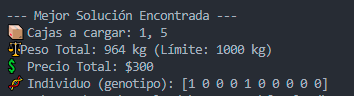

In [ ]:
import numpy as np
import sys
sys.stdout.reconfigure(encoding='utf-8')

# --- Datos del Problema ---
#             Caja: 1    2    3    4    5    6    7    8    9    10
precios = np.array([100, 50, 115, 25, 200, 30, 40, 100, 100, 100])
pesos   = np.array([300, 200, 450, 145, 664, 90, 150, 355, 401, 395])
capacidad_maxima = 1000
n_cajas = 10

# --- Par√°metros del Algoritmo Gen√©tico ---
tamano_poblacion = 20       # Un n√∫mero par
tasa_mutacion = 0.05        # Probabilidad de que un gen (caja) mute
num_generaciones = 200      # Mecanismo de detenci√≥n

# --- 6.2 Generaci√≥n de la Poblaci√≥n Inicial ---
def crear_poblacion_inicial(tamano, n_items, pesos_items, capacidad):
    poblacion = []
    while len(poblacion) < tamano:
        individuo = np.random.randint(2, size=n_items)
        peso_actual = np.sum(individuo * pesos_items)
        if peso_actual <= capacidad:
            poblacion.append(individuo)
    return np.array(poblacion)

# --- 6.3 Funci√≥n de Idoneidad y Selecci√≥n por Ruleta ---
def calcular_idoneidad(poblacion, precios_items):
    return np.dot(poblacion, precios_items)

def seleccion_ruleta(poblacion, idoneidad):
    suma_idoneidad = np.sum(idoneidad)
    if suma_idoneidad == 0:
        probabilidades = np.ones(len(poblacion)) / len(poblacion)
    else:
        probabilidades = idoneidad / suma_idoneidad
    indices_elegidos = np.random.choice(len(poblacion), size=len(poblacion), p=probabilidades)
    return poblacion[indices_elegidos]

# --- 6.4 Cruce, Mutaci√≥n y Verificaci√≥n ---
def cruce_y_mutacion(padres, pesos_items, capacidad, tasa_mut):
    nueva_generacion = []
    np.random.shuffle(padres)
    for i in range(0, len(padres), 2):
        padre1 = padres[i]
        padre2 = padres[i+1] if i + 1 < len(padres) else padres[i]
        
        punto_cruce = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate([padre1[:punto_cruce], padre2[punto_cruce:]])
        hijo2 = np.concatenate([padre2[:punto_cruce], padre1[punto_cruce:]])
        
        for j in range(len(hijo1)):
            if np.random.rand() < tasa_mut:
                hijo1[j] = 1 - hijo1[j]
            if np.random.rand() < tasa_mut:
                hijo2[j] = 1 - hijo2[j]

        if np.sum(hijo1 * pesos_items) <= capacidad:
            nueva_generacion.append(hijo1)
        else:
            nueva_generacion.append(padre1)
        if np.sum(hijo2 * pesos_items) <= capacidad:
            nueva_generacion.append(hijo2)
        else:
            nueva_generacion.append(padre2)
            
    return np.array(nueva_generacion)

# --- 6.5 Proceso Iterativo y Resultado Final ---

print("--- Iniciando Evoluci√≥n del Algoritmo Gen√©tico ---\n")

mejor_individuo_global = None
mejor_idoneidad_global = -1

poblacion = crear_poblacion_inicial(tamano_poblacion, n_cajas, pesos, capacidad_maxima)

for generacion in range(num_generaciones):
    idoneidad = calcular_idoneidad(poblacion, precios)
    
    # Encontrar el mejor individuo de la generaci√≥n actual
    indice_mejor_gen = np.argmax(idoneidad)
    mejor_individuo_gen = poblacion[indice_mejor_gen]
    mejor_idoneidad_gen = idoneidad[indice_mejor_gen]
    
    # Actualizar el mejor individuo global si es necesario
    if mejor_idoneidad_gen > mejor_idoneidad_global:
        mejor_idoneidad_global = mejor_idoneidad_gen
        mejor_individuo_global = mejor_individuo_gen

    # *** NUEVA L√çNEA PARA MOSTRAR EL PROGRESO ***
    # Muestra el mejor resultado encontrado HASTA AHORA en cada generaci√≥n
    peso_actual = np.sum(mejor_individuo_global * pesos)
    print(f"Generaci√≥n {generacion+1:03d} | Mejor Precio: ${mejor_idoneidad_global:<4} | Peso: {peso_actual:<4} kg | Soluci√≥n: {mejor_individuo_global}")

    padres = seleccion_ruleta(poblacion, idoneidad)
    poblacion = cruce_y_mutacion(padres, pesos, capacidad_maxima, tasa_mutacion)

# --- Mostrar Resultados Finales ---
precio_final = np.sum(mejor_individuo_global * precios)
peso_final = np.sum(mejor_individuo_global * pesos)
cajas_seleccionadas = np.where(mejor_individuo_global == 1)[0] + 1

print("\n--- Mejor Soluci√≥n Encontrada ---")
print(f"üì¶ Cajas a cargar: {list(cajas_seleccionadas)}")
print(f"‚öñÔ∏è Peso Total: {peso_final} kg (L√≠mite: {capacidad_maxima} kg)")
print(f"üí≤ Precio Total: ${precio_final}")
print(f"üß¨ Individuo (genotipo): {mejor_individuo_global}")

Resultados de nuestro TaTeTi con interfaz grafica

Aca la IA nos gano:

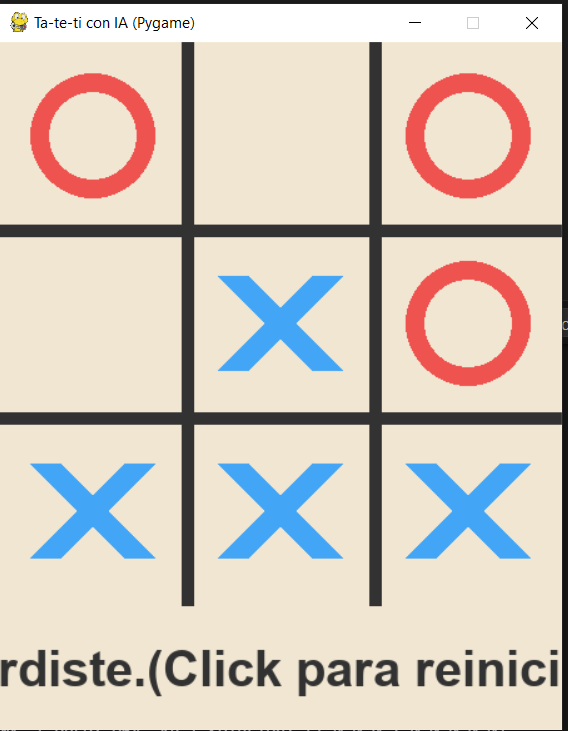

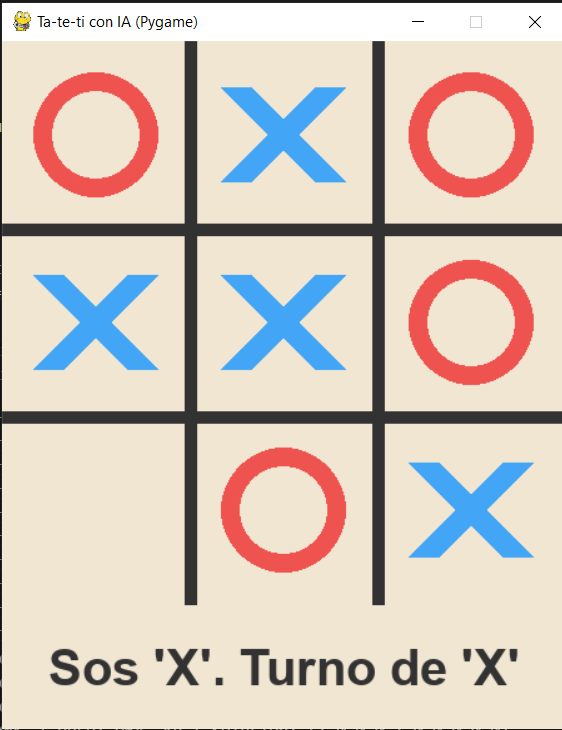

# Bibliograf√≠a

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educaci√≥n S.A. (2a Ed.) Madrid, Espa√±a](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)